# GRU

In [2]:

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [3]:
# Get the data
vocab_size=8000
maxLen=250
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(path="imdb.npz", num_words=vocab_size,
skip_top=0, maxlen=maxLen, seed=113, start_char=1, oov_char=2, index_from=3)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxLen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxLen)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=maxLen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 128)          1024000   
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                31104     
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 1,055,501
Trainable params: 1,055,501
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(x_train,y_train, epochs=NUM_EPOCHS, validation_data=(x_test,y_test))

Epoch 1/10
782/782 [==============================] - 26s 34ms/step - loss: 0.5272 - accuracy: 0.7724 - val_loss: 0.4230 - val_accuracy: 0.8531
Epoch 2/10
782/782 [==============================] - 26s 33ms/step - loss: 0.3595 - accuracy: 0.8816 - val_loss: 0.3476 - val_accuracy: 0.8802
Epoch 3/10
782/782 [==============================] - 26s 33ms/step - loss: 0.2710 - accuracy: 0.9145 - val_loss: 0.3050 - val_accuracy: 0.8936
Epoch 4/10
782/782 [==============================] - 25s 32ms/step - loss: 0.2044 - accuracy: 0.9406 - val_loss: 0.2950 - val_accuracy: 0.8927
Epoch 5/10
782/782 [==============================] - 25s 33ms/step - loss: 0.1593 - accuracy: 0.9554 - val_loss: 0.3209 - val_accuracy: 0.8891
Epoch 6/10
782/782 [==============================] - 25s 32ms/step - loss: 0.1261 - accuracy: 0.9659 - val_loss: 0.3487 - val_accuracy: 0.8836
Epoch 7/10
782/782 [==============================] - 25s 32ms/step - loss: 0.1023 - accuracy: 0.9740 - val_loss: 0.4006 - val_accuracy:

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

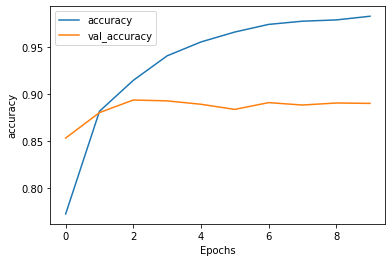

In [11]:
plot_graphs(history, 'accuracy')

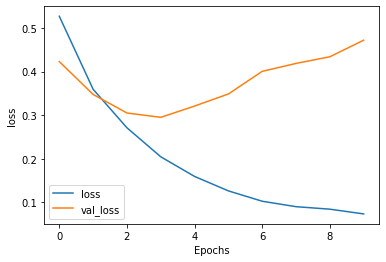

In [12]:
plot_graphs(history, 'loss')